# Forest Fire XD Senior Project
By: Manapat Weeramongkolkul

Supanida Suwankesawong


## Data Exploration

### Library

In [ ]:
# Importing relevant libraries

import pandas as pd
import numpy as np
from datetime import datetime
!pip install pyjanitor
import janitor
from functools import reduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 147 kB 6.7 MB/s 


In [ ]:
# Connect colab and drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### From sensor device



In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Senior Project/Datasets/Results from 2020-2-4 till 2020-7-28 (Only Northern provinces).xlsx")
df1.head()

,id,stationID,nameTH,nameEN,stationType,lat,long,date_aq,time_aq,PM25,PM10,NO2,SO2,CO,O3,AQI,areaTH,areaEN,datetime_aq
0,67972,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,NaN,MOBILE,16.48515,99.524454,2020-02-27,07:00:00,72.0,NaN,NaN,NaN,NaN,NaN,4,"อ.เมือง ,กำแพงเพชร",NaN,2020-02-27 07:00:00
1,68096,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,NaN,MOBILE,16.48515,99.524454,2020-02-27,08:00:00,74.0,NaN,NaN,NaN,NaN,NaN,4,"อ.เมือง ,กำแพงเพชร",NaN,2020-02-27 08:00:00
2,68220,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,NaN,MOBILE,16.48515,99.524454,2020-02-27,09:00:00,77.0,NaN,NaN,NaN,NaN,NaN,4,"อ.เมือง ,กำแพงเพชร",NaN,2020-02-27 09:00:00
3,68344,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-02-27,10:00:00,79.0,NaN,NaN,NaN,NaN,NaN,4,"ต.ในเมือง, อ.เมือง","Mueang, Kamphaeng Phet",2020-02-27 10:00:00
4,68469,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-02-27,11:00:00,80.0,NaN,NaN,NaN,NaN,NaN,4,"ต.ในเมือง, อ.เมือง,กำแพงเพชร","Mueang, Kamphaeng Phet",2020-02-27 11:00:00


In [ ]:
df2 = pd.read_excel("/content/drive/MyDrive/Senior Project/Datasets/Results from 2020-7-20 till 2021-10-18 (Only Northern provinces).xlsx")
df2.head()

,id,stationID,nameTH,nameEN,stationType,lat,long,date_aq,time_aq,PM25,PM10,NO2,SO2,CO,O3,AQI,areaTH,areaEN,datetime_aq
0,912168,o21,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-11-29,14:00:00,22.0,NaN,NaN,NaN,NaN,NaN,1,"ต.ในเมือง อ.เมือง, กำแพงเพชร","Mueang, Kamphaeng Phet",2020-11-29 14:00:00
1,912302,o21,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-11-29,15:00:00,22.0,NaN,NaN,NaN,NaN,NaN,1,"ต.ในเมือง อ.เมือง, กำแพงเพชร","Mueang, Kamphaeng Phet",2020-11-29 15:00:00
2,912436,o21,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-11-29,16:00:00,22.0,NaN,NaN,NaN,NaN,NaN,1,"ต.ในเมือง อ.เมือง, กำแพงเพชร","Mueang, Kamphaeng Phet",2020-11-29 16:00:00
3,912570,o21,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-11-29,17:00:00,22.0,NaN,NaN,NaN,NaN,NaN,1,"ต.ในเมือง อ.เมือง, กำแพงเพชร","Mueang, Kamphaeng Phet",2020-11-29 17:00:00
4,912704,o21,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.48515,99.524454,2020-11-29,18:00:00,22.0,NaN,NaN,NaN,NaN,NaN,1,"ต.ในเมือง อ.เมือง, กำแพงเพชร","Mueang, Kamphaeng Phet",2020-11-29 18:00:00


In [ ]:
ds1 =  pd.concat([df1.reset_index(drop=True), 
                  df2.reset_index(drop=True)], axis=0).reset_index(drop=True)

### FRP

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/MODIS 1_1_2020 -  31_7_2020.csv")
#df3['ACQ_DATE'] = pd.to_datetime(df3['ACQ_DATE'],format='%m/%d/%Y')
df3['ACQ_DATE'] = pd.to_datetime(df3['ACQ_DATE'],format='%Y/%m/%d')
df3['ACQ_DATE'] = df3['ACQ_DATE'].dt.strftime('%m/%d/%Y').astype(str)
#df3['ACQ_DATE'] = df3['ACQ_DATE'].dt.strftime('%02m/%02d/%Y').astype(str)

In [ ]:
df4 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/MODIS 20_7_2020 - 31_12_2020.csv")
df4['ACQ_DATE'] = pd.to_datetime(df4['ACQ_DATE'],format='%Y/%m/%d')
df4['ACQ_DATE'] = df4['ACQ_DATE'].dt.strftime('%m/%d/%Y').astype(str)

In [ ]:
df5 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/MODIS 1_1_2021 - 30_9_2021.csv")
df5['ACQ_DATE'] = pd.to_datetime(df5['ACQ_DATE'],format='%Y/%m/%d')
df5['ACQ_DATE'] = df5['ACQ_DATE'].dt.strftime('%m/%d/%Y').astype(str)

In [ ]:
df6 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/VIIRS 1_1_2020 - 31_7_2020.csv")
df6['ACQ_DATE'] = pd.to_datetime(df6['ACQ_DATE'],format='%Y/%m/%d')
df6['ACQ_DATE'] = df6['ACQ_DATE'].dt.strftime('%m/%d/%Y').astype(str)

In [ ]:
df7 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/VIIRS 20_7_2020 - 31_12_2020.csv")
df7['ACQ_DATE'] = pd.to_datetime(df7['ACQ_DATE'],format='%Y/%m/%d')
df7['ACQ_DATE'] = df7['ACQ_DATE'].dt.strftime('%m/%d/%Y').astype(str)

In [ ]:
df8 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/VIIRS 1_1_2021 - 30_9_2021.csv")
df8['ACQ_DATE'] = pd.to_datetime(df8['ACQ_DATE'],format='%Y/%m/%d')
df8['ACQ_DATE'] = df8['ACQ_DATE'].dt.strftime('%m/%d/%Y').astype(str)

In [ ]:
#merge dataframes
ds2 = pd.concat([df3.reset_index(drop=True),
                 df4.reset_index(drop=True),
                 df5.reset_index(drop=True),
                 df6.reset_index(drop=True),
                 df7.reset_index(drop=True),
                 df8.reset_index(drop=True)],axis=0).reset_index(drop=True)

### From GEE

In [ ]:
dfCO = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/CO.csv")
dfNO2 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/NO2.csv")
dfSO2 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/SO2.csv")
dfO3 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/O3.csv")

In [ ]:
dfCO1TH = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/CO-TH-2020.csv")
dfCO2TH = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/CO-TH-2021.csv")
dfCO3TH = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/CO-TH-2022.csv")
dfNO21TH = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/NO2-TH-2020.csv")
dfNO22TH = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/NO2-TH-2021.csv")
dfNO23TH = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/NO2-TH-2022.csv")
dfSO21TH = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/SO2-TH-2020.csv")
dfSO22TH = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/SO2-TH-2021.csv")
dfSO23TH = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/SO2-TH-2022.csv")
dfO31TH = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/O3-TH-2020.csv")
dfO32TH = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/O3-TH-2021.csv")
dfO33TH = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/O3-TH-2022.csv")


In [ ]:
#merge dataframes
dfCO = pd.concat([dfCO1TH.reset_index(drop=True),
                 dfCO2TH.reset_index(drop=True),
                 dfCO3TH.reset_index(drop=True)],axis=0).reset_index(drop=True)
dfNO2 = pd.concat([dfNO21TH.reset_index(drop=True),
                 dfNO22TH.reset_index(drop=True),
                 dfNO23TH.reset_index(drop=True)],axis=0).reset_index(drop=True)
dfSO2 = pd.concat([dfSO21TH.reset_index(drop=True),
                 dfSO22TH.reset_index(drop=True),
                 dfSO23TH.reset_index(drop=True)],axis=0).reset_index(drop=True)
dfO3 = pd.concat([dfO31TH.reset_index(drop=True),
                 dfO32TH.reset_index(drop=True),
                 dfO33TH.reset_index(drop=True)],axis=0).reset_index(drop=True)

In [ ]:
dfCO['T_NAME_E'].value_counts()

SAN SAI       3
NAM PHRAE     2
WIANG         2
BAN LUANG     2
SAN KLANG     2
             ..
CHOMPHU       1
SARAPHI       1
NONG FAEK     1
YANG NOENG    1
ON KLANG      1
Name: T_NAME_E, Length: 192, dtype: int64

In [ ]:
dfCO_loc = dfCO.iloc[:,[-2]]
dfCO_data = dfCO.iloc[:,1:-2]
df_CO_1 = pd.DataFrame()
for i in range(len(dfCO_data.columns)):
  df_dummy = pd.concat([dfCO_data.iloc[:,i],dfCO_loc],axis=1)
  df_dummy["date_time"] = df_dummy.columns.values[0][0:31]
  df_dummy.rename(columns={list(df_dummy)[0]:'CO_mol/m2'}, inplace=True)
  df_CO_1 = pd.concat([df_CO_1,df_dummy],axis=0).reset_index(drop=True)

In [ ]:
dfCO.iloc[:,1:-1]

,20200101T051608_20200101T054859_CO_column_number_density,20200101T065108_20200101T072730_CO_column_number_density,20200101T065608_20200101T072910_CO_column_number_density,20200101T070108_20200101T072850_CO_column_number_density,20200102T063608_20200102T071051_CO_column_number_density,20200102T064108_20200102T071022_CO_column_number_density,20200103T061608_20200103T065103_CO_column_number_density,20200103T062108_20200103T065146_CO_column_number_density,20200104T055608_20200104T063234_CO_column_number_density,20200104T060108_20200104T063205_CO_column_number_density,...,20221006T063408_20221006T071331_CO_column_number_density,20221006T063908_20221006T071405_CO_column_number_density,20221007T061408_20221007T065412_CO_column_number_density,20221007T061908_20221007T065449_CO_column_number_density,20221008T055408_20221008T063434_CO_column_number_density,20221008T055908_20221008T063546_CO_column_number_density,20221008T073908_20221008T081704_CO_column_number_density,20221009T053908_20221009T061704_CO_column_number_density,20221009T054408_20221009T061749_CO_column_number_density,20221009T071908_20221009T075609_CO_column_number_density
0,NaN,NaN,0.034941,NaN,0.033647,NaN,0.030090,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.036468,0.034833,NaN,0.033284,NaN,0.033350,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.034839,NaN,0.034137,NaN,0.032121,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.045346,NaN,0.046356,NaN,NaN,0.043915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.044584,NaN,0.045655,NaN,NaN,0.044174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.026606,NaN,NaN,0.026117,NaN,0.024799,NaN,NaN,NaN,NaN
2744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.024582,NaN,NaN,0.024940,NaN,0.025191,NaN,NaN,NaN,NaN
2745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027138,0.024883,NaN,NaN,NaN,0.024587,NaN,NaN,NaN,0.025687
2746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.026725,NaN,NaN,NaN,NaN,0.024759,NaN,NaN,NaN,NaN


In [ ]:
dfSO2_loc = dfSO2.iloc[:,[-2]]
dfSO2_data = dfSO2.iloc[:,1:-2]
df_SO2_1 = pd.DataFrame()
for i in range(len(dfSO2_data.columns)):
  df_dummy = pd.concat([dfSO2_data.iloc[:,i],dfSO2_loc],axis=1)
  df_dummy["date_time"] = df_dummy.columns.values[0][0:31]
  df_dummy.rename(columns={list(df_dummy)[0]:'SO2_mol/m2'}, inplace=True)
  df_SO2_1 = pd.concat([df_SO2_1,df_dummy],axis=0).reset_index(drop=True)

In [ ]:
dfNO2_loc = dfNO2.iloc[:,[-2]]
dfNO2_data = dfNO2.iloc[:,1:-2]
df_NO2_1 = pd.DataFrame()
for i in range(len(dfNO2_data.columns)):
  df_dummy = pd.concat([dfNO2_data.iloc[:,i],dfNO2_loc],axis=1)
  df_dummy["date_time"] = df_dummy.columns.values[0][0:31]
  df_dummy.rename(columns={list(df_dummy)[0]:'NO2_mol/m2'}, inplace=True)
  df_NO2_1 = pd.concat([df_NO2_1,df_dummy],axis=0).reset_index(drop=True)

In [ ]:
dfO3_loc = dfO3.iloc[:,[-2]]
dfO3_data = dfO3.iloc[:,1:-2]
df_O3_1 = pd.DataFrame()
for i in range(len(dfO3_data.columns)):
  df_dummy = pd.concat([dfO3_data.iloc[:,i],dfO3_loc],axis=1)
  df_dummy["date_time"] = df_dummy.columns.values[0][0:31]
  df_dummy.rename(columns={list(df_dummy)[0]:'O3_mol/m2'}, inplace=True)
  df_O3_1 = pd.concat([df_O3_1,df_dummy],axis=0).reset_index(drop=True)

In [ ]:
def specific_date(date_time):
  date = date_time[4:6] + "/" + date_time[6:8] + "/" + date_time[:4]
  return date

def specific_time(date_time):
  open = date_time[9:15]
  close = date_time[25:31]
  time = close[0:2] + ":00:00"
  return time

In [ ]:
df_CO_1['date'] = df_CO_1['date_time'].apply(specific_date)
df_CO_1['time'] = df_CO_1['date_time'].apply(specific_time)
df_SO2_1['date'] = df_SO2_1['date_time'].apply(specific_date)
df_SO2_1['time'] = df_SO2_1['date_time'].apply(specific_time)
df_O3_1['date'] = df_O3_1['date_time'].apply(specific_date)
df_O3_1['time'] = df_O3_1['date_time'].apply(specific_time)
df_NO2_1['date'] = df_NO2_1['date_time'].apply(specific_date)
df_NO2_1['time'] = df_NO2_1['date_time'].apply(specific_time)

In [ ]:
df_CO_1 = df_CO_1.drop(['date_time'], axis = 1)
df_SO2_1 = df_SO2_1.drop(['date_time'], axis = 1)
df_O3_1 = df_O3_1.drop(['date_time'], axis = 1)
df_NO2_1 = df_NO2_1.drop(['date_time'], axis = 1)
df_CO_1 = df_CO_1.dropna()
df_SO2_1 = df_SO2_1.dropna()
df_O3_1 = df_O3_1.dropna()
df_NO2_1 = df_NO2_1.dropna()

In [ ]:
df_GEE_1 = [df_O3_1,df_NO2_1,df_CO_1,df_SO2_1]
df_GEE = reduce(lambda  left,right: pd.merge(left,right,on=['date','time','T_NAME_E'],how='inner'), df_GEE_1)
df_GEE = df_GEE.drop_duplicates()
df_GEE = df_GEE.reindex(columns=['T_NAME_E','date','time','CO_mol/m2','SO2_mol/m2','NO2_mol/m2','O3_mol/m2'])

In [ ]:
 df_GEE.to_csv("gee.csv")

### Latitude and Longtitude of district in Chiang Mai

In [ ]:
df_district = pd.read_excel("/content/drive/MyDrive/Senior Project/Datasets/tambon.xlsx")
df_district_CM = df_district[df_district["CHANGWAT_E"].str.contains("Chiang Mai") == True].reset_index(drop=True)
df_district_CM['TAMBON_E'] = df_district_CM['TAMBON_E'].str.upper()
df_district_loc = df_district_CM[['TAMBON_E','LAT','LONG',]]

In [ ]:
df_GEE_loc = pd.merge(df_GEE, df_district_loc, left_on='T_NAME_E', right_on='TAMBON_E')

In [ ]:
df_GEE_loc

,T_NAME_E,date,time,CO_mol/m2,SO2_mol/m2,NO2_mol/m2,O3_mol/m2,TAMBON_E,LAT,LONG
0,HOT,01/01/2020,07:00:00,0.036608,0.000178,0.000039,0.108920,HOT,18.103,98.583
1,HOT,01/02/2020,07:00:00,0.037975,0.000123,0.000047,0.107653,HOT,18.103,98.583
2,HOT,01/06/2020,07:00:00,0.041067,0.000171,0.000044,0.109251,HOT,18.103,98.583
3,HOT,01/07/2020,07:00:00,0.034905,-0.000170,0.000046,0.109101,HOT,18.103,98.583
4,HOT,01/09/2020,06:00:00,0.044490,-0.000114,0.000058,0.103906,HOT,18.103,98.583
...,...,...,...,...,...,...,...,...,...,...
236629,ON KLANG,09/11/2021,07:00:00,0.025059,-0.000072,0.000054,0.122490,ON KLANG,18.758,99.263
236630,ON KLANG,09/11/2021,07:00:00,0.025059,-0.000072,0.000067,0.122490,ON KLANG,18.758,99.263
236631,ON KLANG,09/12/2021,07:00:00,0.025205,0.000028,0.000055,0.121675,ON KLANG,18.758,99.263
236632,ON KLANG,09/21/2021,07:00:00,0.025739,-0.000149,0.000053,0.123804,ON KLANG,18.758,99.263


## Data Labeling Pipeline

In [ ]:
# Convert FRP data to {0,1}
ds2["FireOccurred"]=(ds2['FRP'] > 100).astype(int)
ds2.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,FireOccurred
0,18.4522,103.4546,313.0,1.3,1.1,01/01/2020,03:59,Terra,MODIS,44,6.03,299.5,7.2,D,0.0,0
1,17.8460,103.2679,320.8,1.3,1.1,01/01/2020,03:59,Terra,MODIS,68,6.03,300.1,11.8,D,0.0,0
2,17.8479,103.2563,320.7,1.3,1.1,01/01/2020,03:59,Terra,MODIS,68,6.03,299.6,11.6,D,0.0,0
3,17.8578,103.2580,319.2,1.3,1.1,01/01/2020,03:59,Terra,MODIS,29,6.03,300.2,9.5,D,0.0,0
4,16.7559,102.1498,324.3,1.1,1.1,01/01/2020,04:00,Terra,MODIS,77,6.03,294.3,17.9,D,0.0,0


## Data Cleaning Pipeline

### From sensor device

In [ ]:
ds1['date_aq'] = pd.to_datetime(ds1['date_aq'],format='%m/%d/%Y')
ds1['date_aq'] = ds1['date_aq'].dt.strftime('%m/%d/%Y').astype(str)

In [ ]:
ds1 = ds1.drop_duplicates()
ds2 = ds2.drop_duplicates()
ds2.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE
0,18.4522,103.4546,313.0,1.3,1.1,01/01/2020,359,Terra,MODIS,44,6.03,299.5,7.2,D,0.0
1,17.8460,103.2679,320.8,1.3,1.1,01/01/2020,359,Terra,MODIS,68,6.03,300.1,11.8,D,0.0
2,17.8479,103.2563,320.7,1.3,1.1,01/01/2020,359,Terra,MODIS,68,6.03,299.6,11.6,D,0.0
3,17.8578,103.2580,319.2,1.3,1.1,01/01/2020,359,Terra,MODIS,29,6.03,300.2,9.5,D,0.0
4,16.7559,102.1498,324.3,1.1,1.1,01/01/2020,400,Terra,MODIS,77,6.03,294.3,17.9,D,0.0


In [ ]:
ds1['nameTH'].unique()

array([' ที่ว่าการอำเภอเมืองกำแพงเพชร', 'โครงการชลประทานนครสวรรค์',
       'โรงเรียนยุพราชวิทยาลัย ', 'โรงพยาบาลเฉลิมพระเกียรติ ',
       'โรงพยาบาลส่งเสริมสุขภาพตำบลท่าสี ',
       'โรงพยาบาลส่งเสริมสุขภาพตำบลบ้านสบป้าด ',
       'การประปาส่วนภูมิภาคแม่เมาะ', 'ศาลากลางจ.อุทัยธานี',
       'ศูนย์การศึกษานอกโรงเรียน', 'ศูนย์ราชการจังหวัดเชียงใหม่ ',
       'สถานีอุตุนิยมวิทยาลำปาง', 'สนามกีฬาจังหวัดพะเยา',
       'สำนักงานเทศบาลเมืองน่าน', 'สำนักงานเทศบาลเมืองสุโขทัยธานี',
       'สำนักงานเทศบาลเมืองอุตรดิตถ์',
       'สำนักงานทรัพยากรธรรมชาติและสิ่งแวดล้อมจังหวัดเชียงราย',
       'สำนักงานทรัพยากรธรรมชาติและสิ่งแวดล้อมจังหวัดแม่ฮ่องสอน',
       'สำนักงานทรัพยากรธรรมชาติและสิ่งแวดล้อมจังหวัดปัตตานี',
       'สำนักงานสาธารณสุขแม่สาย', 'สำนักทรัพยากรน้ำบาดาลเขต 6 ตรัง',
       'อุตุนิยมวิทยาจังหวัดแพร่', 'อุตุนิยมวิทยาลำพูน',
       'สวนชมน่านเฉลิมพระเกียรต (รถโมบาย)', 'สวนชมน่านเฉลิมพระเกียรติ',
       'สวนมหามงคลเฉลิมพระชนมพรรษา 6 รอบ 5 ธันวาคม 2552 อุตรดิตถ์'],
      dtype=object)

In [ ]:
ds1_sensor.apply(lambda col: pd.factorize(col, sort=True)[0]).value_counts()

sensor_NO
14           14600
18           14575
6            14553
19           14515
3            14495
20           14483
4            14477
5            14443
11           14441
13           14439
22           14436
12           14382
21           14350
24           14350
1            14078
23           13900
2            11037
0             6977
8             6598
15            5939
9             2740
16            2523
10            2491
17            2274
7                4
dtype: int64

In [ ]:
ds1['nameEN'].value_counts()

Municipality Office, Nan                                 14600
Meteorology Center, Phrae                                14575
Phayao Provincial, Phayao                                14553
Meteorological Staions, Lamphun                          14515
Non-Formal Education Centre, Mea Sot                     14495
Nakhonsawan Irrigation Project                           14483
City Hall, Chiangmai                                     14477
Meteorological stations, Lampang                         14443
Natural Resources and Environment Office, Chiangrai      14441
Maesai Health Office                                     14439
Health Promotion Hospital Sob Pad, Lampang               14436
Natural Resources and Environment Office, Mae Hongson    14382
Health Promotion Hospital                                14350
Yupparaj Wittayalai School                               14350
Provincial Waterworks Authority Mae Moh                  14078
Chalermprakiet Hospital                                

In [ ]:
ds1_sensor = pd.DataFrame(ds1['nameTH'].copy())
ds1_sensor.rename(columns={'nameTH':'sensor_NO'}, inplace = True)
ds1_sensor = ds1_sensor.apply(lambda col: pd.factorize(col, sort=True)[0])
ds1 = pd.concat([ds1,ds1_sensor], axis = 1)

In [ ]:
ds1

,id,stationID,nameTH,nameEN,stationType,lat,long,date_aq,time_aq,PM25,PM10,NO2,SO2,CO,O3,AQI,areaTH,areaEN,datetime_aq,sensor_NO
0,67972,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,NaN,MOBILE,16.485150,99.524454,02/27/2020,07:00:00,72.0,NaN,NaN,NaN,NaN,NaN,4,"อ.เมือง ,กำแพงเพชร",NaN,2020-02-27 07:00:00,0
1,68096,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,NaN,MOBILE,16.485150,99.524454,02/27/2020,08:00:00,74.0,NaN,NaN,NaN,NaN,NaN,4,"อ.เมือง ,กำแพงเพชร",NaN,2020-02-27 08:00:00,0
2,68220,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,NaN,MOBILE,16.485150,99.524454,02/27/2020,09:00:00,77.0,NaN,NaN,NaN,NaN,NaN,4,"อ.เมือง ,กำแพงเพชร",NaN,2020-02-27 09:00:00,0
3,68344,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.485150,99.524454,02/27/2020,10:00:00,79.0,NaN,NaN,NaN,NaN,NaN,4,"ต.ในเมือง, อ.เมือง","Mueang, Kamphaeng Phet",2020-02-27 10:00:00,0
4,68469,o25,ที่ว่าการอำเภอเมืองกำแพงเพชร,"District Hall, Kamphaeng Phet",MOBILE,16.485150,99.524454,02/27/2020,11:00:00,80.0,NaN,NaN,NaN,NaN,NaN,4,"ต.ในเมือง, อ.เมือง,กำแพงเพชร","Mueang, Kamphaeng Phet",2020-02-27 11:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277118,1953674,68t,อุตุนิยมวิทยาลำพูน,"Meteorological Staions, Lamphun",GROUND,18.567179,99.038560,10/18/2021,16:00:00,9.0,20.0,5.0,2.0,0.48,NaN,1,"ต.บ้านกลาง อ.เมือง, ลำพูน","ฺBan Klang, Mueang, Lamphun",2021-10-18 16:00:00,19
277119,1953806,68t,อุตุนิยมวิทยาลำพูน,"Meteorological Staions, Lamphun",GROUND,18.567179,99.038560,10/18/2021,17:00:00,9.0,21.0,5.0,2.0,0.48,NaN,1,"ต.บ้านกลาง อ.เมือง, ลำพูน","ฺBan Klang, Mueang, Lamphun",2021-10-18 17:00:00,19
277120,1953938,68t,อุตุนิยมวิทยาลำพูน,"Meteorological Staions, Lamphun",GROUND,18.567179,99.038560,10/18/2021,18:00:00,9.0,20.0,6.0,1.0,0.48,NaN,1,"ต.บ้านกลาง อ.เมือง, ลำพูน","ฺBan Klang, Mueang, Lamphun",2021-10-18 18:00:00,19
277121,1954070,68t,อุตุนิยมวิทยาลำพูน,"Meteorological Staions, Lamphun",GROUND,18.567179,99.038560,10/18/2021,19:00:00,9.0,20.0,10.0,1.0,0.51,NaN,1,"ต.บ้านกลาง อ.เมือง, ลำพูน","ฺBan Klang, Mueang, Lamphun",2021-10-18 19:00:00,19


In [ ]:
def getTime(t):
  if len(str(t))==3 :
    return '0'+str(t)[0] + ':' + str(t)[1:]
  elif len(str(t))==4 :
    return str(t)[:2] + ':' + str(t)[2:]

In [ ]:
ds2['ACQ_TIME'] = ds2['ACQ_TIME'].apply(getTime)

In [ ]:
ds2.shape

(420525, 15)

In [ ]:
ds2["FireOccurred"].sum()

1465

In [ ]:
ds1_CNX=ds1[ds1["areaTH"].str.contains("เชียงใหม่") == True].reset_index(drop=True)
ds1_CNX.loc[0]

In [ ]:
ds1_CNX['nameEN'].unique()

In [ ]:
def ApproxTime(t):
  if t[-2:] >= "30" :
    if int(t[:2]) < 10 :
      s = '0'+str(int(t[:2])+1) + ':00:00' 
    else :
      s = str(int(t[:2])+1) + ':00:00' 
  elif t[-2:] < "30" :
    if int(t[:2]) < 10 :
      s = t[:2] + ':00:00' 
    else :
      s = t[:2] + ':00:00' 
  return s
  #return datetime.strptime(s,'%H:%M:%S').time()

In [ ]:
ds2_1 = ds2.copy()
ds1_1 = ds1.copy()
#ds1_1 = ds1_CNX.copy()
# 1 degree = 111 km
ds2_1["lat_high"] = ds2_1["LATITUDE"] + 5/111
ds2_1["lat_low"] = ds2_1["LATITUDE"] - 5/111
ds2_1["long_high"] = ds2_1["LONGITUDE"] + 5/111
ds2_1["long_low"] = ds2_1["LONGITUDE"] - 5/111
ds2_1["time_acq"] = ds2_1['ACQ_TIME'].apply(ApproxTime)
ds1_1["time_aq"] = ds1_1["time_aq"].astype(str)
ds2_1.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,...,BRIGHT_T31,FRP,DAYNIGHT,TYPE,FireOccurred,lat_high,lat_low,long_high,long_low,time_acq
0,18.4522,103.4546,313.0,1.3,1.1,01/01/2020,03:59,Terra,MODIS,44,...,299.5,7.2,D,0.0,0,18.497245,18.407155,103.499645,103.409555,04:00:00
1,17.8460,103.2679,320.8,1.3,1.1,01/01/2020,03:59,Terra,MODIS,68,...,300.1,11.8,D,0.0,0,17.891045,17.800955,103.312945,103.222855,04:00:00
2,17.8479,103.2563,320.7,1.3,1.1,01/01/2020,03:59,Terra,MODIS,68,...,299.6,11.6,D,0.0,0,17.892945,17.802855,103.301345,103.211255,04:00:00
3,17.8578,103.2580,319.2,1.3,1.1,01/01/2020,03:59,Terra,MODIS,29,...,300.2,9.5,D,0.0,0,17.902845,17.812755,103.303045,103.212955,04:00:00
4,16.7559,102.1498,324.3,1.1,1.1,01/01/2020,04:00,Terra,MODIS,77,...,294.3,17.9,D,0.0,0,16.800945,16.710855,102.194845,102.104755,04:00:00


In [ ]:
ds_merge1 = ds1_1.conditional_join(ds2_1, ("lat","lat_high", "<="), ("lat","lat_low", ">="), ("long","long_high", "<="), ("long","long_low", ">="), ("date_aq","ACQ_DATE", "=="), ("time_aq","time_acq", "=="))
ds_merge1.loc[:,['FRP','lat','long','LATITUDE','LONGITUDE','time_acq','date_aq','ACQ_DATE','time_aq']].shape

(994, 9)

In [ ]:
ds1_1['nameEN'].nunique()
ds_merge1.loc[:,['FRP','lat','long','LATITUDE','LONGITUDE','time_acq','date_aq','ACQ_DATE','time_aq']]

,FRP,lat,long,LATITUDE,LONGITUDE,time_acq,date_aq,ACQ_DATE,time_aq
0,1.6,15.686254,100.110542,15.72530,100.14859,07:00:00,02/27/2020,02/27/2020,07:00:00
1,1.8,18.282664,99.659873,18.24696,99.62376,19:00:00,02/27/2020,02/27/2020,19:00:00
2,1.8,18.282664,99.659873,18.25106,99.62046,19:00:00,02/27/2020,02/27/2020,19:00:00
3,1.4,19.304686,97.970999,19.34131,97.98842,19:00:00,02/27/2020,02/27/2020,19:00:00
4,0.6,19.304686,97.970999,19.34558,98.00413,19:00:00,02/27/2020,02/27/2020,19:00:00
...,...,...,...,...,...,...,...,...,...
989,9.5,19.304686,97.970999,19.30290,97.96940,04:00:00,09/21/2021,09/21/2021,04:00:00
990,10.7,18.567179,99.038560,18.58580,99.05530,04:00:00,09/21/2021,09/21/2021,04:00:00
991,12.9,19.909242,99.823357,19.89590,99.82590,04:00:00,09/09/2020,09/09/2020,04:00:00
992,4.9,18.278251,99.506447,18.29160,99.50830,07:00:00,09/04/2021,09/04/2021,07:00:00


In [ ]:
ds_merge1.loc[ds_merge1["FireOccurred"]==1, ['FRP','lat','long','LATITUDE','LONGITUDE','time_acq','date_aq','ACQ_DATE','time_aq']].shape

(13, 9)

In [ ]:
ds_m = ds_merge1[['sensor_NO','lat','long','lat_low','LATITUDE','lat_high','long_low','LONGITUDE','long_high',"PM25","PM10","NO2","SO2","CO","O3",'FireOccurred','BRIGHTNESS','DAYNIGHT','BRIGHT_T31','time_acq','ACQ_DATE','INSTRUMENT',]].sort_values(by=['ACQ_DATE'])
ds_m = ds_m.reset_index(drop=True)

In [ ]:
ds2_1.loc[ds2_1['FireOccurred']==1].to_csv("fire.csv",index=False)
ds1_1.to_csv("cnx.csv",index=False)

In [ ]:
ds_m['LONGITUDE'].nunique()

914

In [ ]:
ds_m.to_csv("merge.csv")

In [ ]:
ds_m1 = ds_m.copy().dropna()
ds_m1['ACQ_DATE'] = pd.to_datetime(ds_m1['ACQ_DATE'])
ds_m1['ACQ_DATE'] = ds_m1['ACQ_DATE'].dt.strftime('%d/%m/%Y')
ds_m1 = ds_m1.sort_values('ACQ_DATE').reset_index(drop=True)

ds_m1.to_csv("test.csv")

In [ ]:
ds_m1["FireOccurred"].sum()

In [ ]:
ds_m1['sensor_NO'].value_counts()

23    45
19    38
14    22
20    20
22    16
5      2
8      1
Name: sensor_NO, dtype: int64

In [ ]:
ds_m1["FireOccurred"].sum()/ds_m1.shape[0]

In [ ]:
ds_m["Next_datetime_aq"] = ds_m["datetime_aq"].tolist()[1:] + ds_m["datetime_aq"].tolist()[:1]
ds_m.tail()
# last row use data from first row

In [ ]:
  ds_m["TimeDelta"] = ds_m["Next_datetime_aq"]-ds_m["datetime_aq"]
  ds_m.head()

In [ ]:
#it doesn't work
f = df1.copy()
f['NO2'] = np.where((f['TimeDelta'] <= pd.to_timedelta("0 days 02:00:00")) & (f["NO2"].isna()), f['NO2'].interpolate(method='nearest',limit=2), f['NO2'])
f[7550:7600]

In [ ]:
ds_m = pd.concat((ds_m,pd.get_dummies(ds_m["DAYNIGHT"])), axis = 1)

In [ ]:
ds_m = ds_m.drop(["DAYNIGHT"], axis = 1)
ds_m = ds_m.drop(["N"], axis = 1)

In [ ]:
ds_m = ds_m.rename(columns = {"D":"DAYNIGHT"})

### From GEE

In [ ]:
df_GEE_merge1 = df_GEE_loc.conditional_join(ds2_1, ("LAT","lat_high", "<="), ("LAT","lat_low", ">="), ("LONG","long_high", "<="), ("LONG","long_low", ">="), ("date","ACQ_DATE", "=="), ("time","time_acq", "=="))
df_GEE_merge1.loc[:,["time","time_acq",'date','ACQ_DATE']]

,time,time_acq,date,ACQ_DATE
0,07:00:00,07:00:00,01/02/2020,01/02/2020
1,07:00:00,07:00:00,01/02/2020,01/02/2020
2,07:00:00,07:00:00,01/02/2020,01/02/2020
3,07:00:00,07:00:00,01/02/2020,01/02/2020
4,07:00:00,07:00:00,01/02/2020,01/02/2020
...,...,...,...,...
2411,07:00:00,07:00:00,05/23/2021,05/23/2021
2412,07:00:00,07:00:00,05/23/2021,05/23/2021
2413,07:00:00,07:00:00,05/20/2020,05/20/2020
2414,07:00:00,07:00:00,05/20/2020,05/20/2020


In [ ]:
df_GEE_merge1["FireOccurred"].sum()/df_GEE_merge1.shape[0]

0.0012417218543046358

In [ ]:
df_GEE_merge1.loc[df_GEE_merge1["FireOccurred"]==1, ["FireOccurred",'LAT','LONG','LATITUDE','LONGITUDE','time_acq','date','ACQ_DATE','time']].shape

(3, 9)

## Data Detection Pipeline

For when new data is loaded into the Google Drive

{Fill in dataset(s) format here}
<br>Attributes & datatype

## Model Training & Model Evaluation

Model training specifications: https://docs.google.com/document/d/1UiDi8nyTcfMeMNIAz3KntlVZBlYrpoMAURuDccTt-wk/edit?usp=sharing

Model Evaluation: Identifying the best parameters for each model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/test.csv")
df1.head()

,Unnamed: 0,sensor_NO,lat,long,lat_low,LATITUDE,lat_high,long_low,LONGITUDE,long_high,...,SO2,CO,O3,FireOccurred,BRIGHTNESS,DAYNIGHT,BRIGHT_T31,time_acq,ACQ_DATE,INSTRUMENT
0,0,20,15.686254,100.110542,15.682425,15.72747,15.772515,100.035455,100.08050,100.125545,...,1.0,0.56,27.0,0,338.3,D,294.3,07:00:00,01/03/2020,VIIRS
1,1,23,19.322380,101.025365,19.285595,19.33064,19.375685,101.003925,101.04897,101.094015,...,3.0,0.44,86.0,0,307.3,N,294.2,18:00:00,01/04/2020,VIIRS
2,2,23,19.322380,101.025365,19.245805,19.29085,19.335895,100.976825,101.02187,101.066915,...,3.0,0.44,86.0,0,312.2,N,295.1,18:00:00,01/04/2020,VIIRS
3,3,23,19.322380,101.025365,19.241655,19.28670,19.331745,100.975635,101.02068,101.065725,...,3.0,0.44,86.0,0,338.4,N,295.3,18:00:00,01/04/2020,VIIRS
4,4,23,19.322380,101.025365,19.241055,19.28610,19.331145,100.980465,101.02551,101.070555,...,3.0,0.44,86.0,0,337.3,N,296.8,18:00:00,01/04/2020,VIIRS


In [ ]:
df1['FireOccurred'].value_counts()

0    134
1     10
Name: FireOccurred, dtype: int64

In [ ]:
len(df1.columns)

23

In [ ]:
X = df1.drop('FireOccurred', axis=1)
y = df1['FireOccurred']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(len(df1.columns)-1):
  print(i)
  X.iloc[:,i] = le.fit_transform(X.iloc[:,i])

display(X)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


,Unnamed: 0,sensor_NO,lat,long,lat_low,LATITUDE,lat_high,long_low,LONGITUDE,long_high,...,NO2,SO2,CO,O3,BRIGHTNESS,DAYNIGHT,BRIGHT_T31,time_acq,ACQ_DATE,INSTRUMENT
0,0,4,0,3,18,18,18,62,62,62,...,4,1,28,22,80,0,23,4,0,1
1,1,6,6,6,134,134,134,140,140,140,...,11,3,21,42,10,1,22,6,1,1
2,2,6,6,6,105,105,105,112,112,112,...,11,3,21,42,20,1,26,6,1,1
3,3,6,6,6,100,100,100,110,110,110,...,11,3,21,42,81,1,27,6,1,1
4,4,6,6,6,99,99,99,122,122,122,...,11,3,21,42,78,1,34,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,6,6,6,104,104,104,137,137,137,...,16,1,55,11,51,0,41,2,70,0
140,140,6,6,6,106,106,106,100,100,100,...,16,1,55,11,89,0,55,2,70,0
141,141,6,6,6,113,113,113,104,104,104,...,16,1,55,11,89,0,48,2,70,0
142,142,6,6,6,131,131,131,130,130,130,...,17,1,57,9,66,0,75,3,70,1


In [ ]:
# Dummy data (delete later)

from sklearn import datasets

breast_cancer = datasets.load_breast_cancer()
X_loaded = breast_cancer.data
y_loaded = breast_cancer.target

X = pd.DataFrame(X_loaded)
y = pd.DataFrame(y_loaded)
display(y.value_counts())

1    357
0    212
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# 80:10:10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=1, shuffle=True)

In [ ]:
if len(X_train)==len(y_train) and len(X_test) == len(y_test) and len(X_val) == len(y_val):
  print("X and y data length matching")
else:
  print("Error in data pipeline")
print()
print("No. of training data = %d" % len(X_train))
print("No. of validation data = %d" % len(X_val))
print("No. of testing data = %d" % len(X_test))

X and y data length matching

No. of training data = 114
No. of validation data = 15
No. of testing data = 15


In [ ]:
models = pd.DataFrame(columns = ['model_name', 'model', 'parameters'])
models_eval = pd.DataFrame(columns = ['model_name', 'confusion_matrix', 'accuracy', 'recall', 'f1_score', 'roc_auc_score'])

### Random Forest Classifier

Library: Scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

name = 'rnd_clf'

train = pd.DataFrame(columns = ['n_estimators', 'max_depth', 'n_jobs', 'random_state'])
train = train.append({'n_estimators' : 10, 'max_depth' : None, 'n_jobs': -1, 'random_state': 10}, ignore_index=True)
train = train.append({'n_estimators' : 500, 'max_depth' : None, 'n_jobs': -1, 'random_state': 10}, ignore_index=True)
train = train.append({'n_estimators' : 1000, 'max_depth' : None, 'n_jobs': -1, 'random_state': 10}, ignore_index=True)

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    rnd_clf = RandomForestClassifier(n_estimators = int(row['n_estimators']), max_depth = None, 
                                    n_jobs = int(row['n_jobs']), random_state = int(row['random_state']))
    rnd_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = rnd_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    acc = accuracy_score(y_true, y_pred)
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 
                            'model': rnd_clf, 
                            'parameters': rnd_clf.get_params()}, 
                           ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 
                                      'confusion_matrix' : cfm, 
                                      'accuracy': acc, 
                                      'recall' : recs, 
                                      'f1_score': f1s, 
                                      'roc_auc_score': rocs}, 
                                     ignore_index=True)

In [ ]:
display(models['model'][0])
display(models['model_name'][0])
display(models['parameters'][0])

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=10)

'rnd_clf0'

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Plot Classifier

### Decision Tree

Library: Scikit-learn

In [ ]:
from sklearn.tree import DecisionTreeClassifier

name = 'tree_clf'

train = pd.DataFrame(columns = ['criterion', 'splitter', 'n_jobs', 'random_state'])
train = train.append({'criterion' : 'gini','splitter': 'best', 'random_state': 10}, ignore_index=True)
train = train.append({'criterion' : 'entropy','splitter': 'best', 'random_state': 10}, ignore_index=True)
train = train.append({'criterion' : 'gini','splitter': 'random', 'random_state': 10}, ignore_index=True)

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    tree_clf = DecisionTreeClassifier(criterion = row['criterion'], splitter = row['splitter'], max_depth = None, random_state = row['random_state'])
    tree_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = tree_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    acc = accuracy_score(y_true, y_pred)
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 
                            'model': tree_clf, 
                            'parameters': tree_clf.get_params()}, 
                           ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 
                                      'confusion_matrix' : cfm, 
                                      'accuracy': acc, 
                                      'recall' : recs, 
                                      'f1_score': f1s, 
                                      'roc_auc_score': rocs}, 
                                     ignore_index=True)

In [ ]:
# Plot Classifier

import os
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                filled=True,
                rounded=True)

os.system('dot -Tpng tree.dot -o tree.png')

512

### Support Vector Machine (SVM)

Library: Scikit-learn

In [ ]:
from sklearn.svm import SVC

name = 'svc_clf'

train = pd.DataFrame(columns = ['kernel', 'random_state'])
train = train.append({'kernel' : 'rbf', 'random_state': 10}, ignore_index=True)
train = train.append({'kernel' : 'sigmoid', 'random_state': 10}, ignore_index=True)
train = train.append({'kernel' : 'linear', 'random_state': 10}, ignore_index=True)

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    svc_clf = SVC(kernel=row["kernel"], random_state = int(row["random_state"]))
    svc_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = svc_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    acc = accuracy_score(y_true, y_pred)
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 
                            'model': svc_clf, 
                            'parameters': svc_clf.get_params()}, 
                           ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 
                                      'confusion_matrix' : cfm, 
                                      'accuracy': acc, 
                                      'recall' : recs, 
                                      'f1_score': f1s, 
                                      'roc_auc_score': rocs}, 
                                     ignore_index=True)

### Logistic Regression

Library: Scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

name = 'log_clf'

train = pd.DataFrame(columns = ['penalty', 'n_jobs','random_state'])
train = train.append({'penalty' : 'l2', 'n_jobs': -1, 'random_state': 10}, ignore_index=True)
train = train.append({'penalty' : 'l2', 'n_jobs': -1, 'random_state': 2}, ignore_index=True)
train = train.append({'penalty' : 'none', 'n_jobs': -1, 'random_state': 2}, ignore_index=True)

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    log_clf = LogisticRegression(penalty = row['penalty'], n_jobs = int(row['n_jobs']), random_state = int(row['random_state']))
    log_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = log_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    acc = accuracy_score(y_true, y_pred)
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 
                            'model': log_clf, 
                            'parameters': log_clf.get_params()}, 
                           ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 
                                      'confusion_matrix' : cfm, 
                                      'accuracy': acc, 
                                      'recall' : recs, 
                                      'f1_score': f1s, 
                                      'roc_auc_score': rocs}, 
                                     ignore_index=True)

### Naive Bayes

Library: Scikit-learn

In [ ]:
from sklearn.naive_bayes import GaussianNB

name = 'bayes_clf'

train = pd.DataFrame(columns = ['var_smoothing'])
train = train.append({'var_smoothing': 1e-10}, ignore_index=True)
train = train.append({'var_smoothing': 1e-20}, ignore_index=True)
train = train.append({'var_smoothing': 1e-5}, ignore_index=True)

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    bayes_clf = GaussianNB(var_smoothing = row['var_smoothing'])
    bayes_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = bayes_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    acc = accuracy_score(y_true, y_pred)
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 
                            'model': bayes_clf, 
                            'parameters': bayes_clf.get_params()}, 
                           ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 
                                      'confusion_matrix' : cfm, 
                                      'accuracy': acc, 
                                      'recall' : recs, 
                                      'f1_score': f1s, 
                                      'roc_auc_score': rocs}, 
                                     ignore_index=True)

### K-Nearest Neighbor

Library: Scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

name = 'neigh_clf'

train = pd.DataFrame(columns = ['n_neighbors', 'algorithm', 'n_jobs'])
train = train.append({'n_neighbors': 5, 'algorithm':'auto', 'n_jobs':-1}, ignore_index=True)
train = train.append({'n_neighbors': 1, 'algorithm':'auto', 'n_jobs':-1}, ignore_index=True)
train = train.append({'n_neighbors': 20, 'algorithm':'kd_tree', 'n_jobs':-1}, ignore_index=True)

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    neigh_clf = KNeighborsClassifier(n_neighbors=int(row['n_neighbors']), algorithm = row['algorithm'], n_jobs = int(row['n_jobs']))
    neigh_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = neigh_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    acc = accuracy_score(y_true, y_pred)
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 
                            'model': neigh_clf, 
                            'parameters': neigh_clf.get_params()}, 
                           ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 
                                      'confusion_matrix' : cfm, 
                                      'accuracy': acc, 
                                      'recall' : recs, 
                                      'f1_score': f1s, 
                                      'roc_auc_score': rocs}, 
                                     ignore_index=True)

### Gradient Boosting Classifier

Library: Scikit-learn

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

name = 'gboost_clf'

train = pd.DataFrame(columns = ['n_estimators', 'learning_rate', 'max_depth', 'random_state'])
train = train.append({'n_estimators': 100, 'learning_rate':0.1, 'max_depth':3, 'random_state':10}, ignore_index=True)
train = train.append({'n_estimators': 500, 'learning_rate':0.5, 'max_depth':1, 'random_state':10}, ignore_index=True)
train = train.append({'n_estimators': 50, 'learning_rate':0.01, 'max_depth':10, 'random_state':10}, ignore_index=True)

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    gboost_clf = GradientBoostingClassifier(n_estimators=int(row['n_estimators']), learning_rate=row['learning_rate'],
                                            max_depth=int(row['max_depth']), random_state=int(row['random_state']))
    gboost_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = gboost_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    acc = accuracy_score(y_true, y_pred)
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 
                            'model': gboost_clf, 
                            'parameters': gboost_clf.get_params()}, 
                           ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 
                                      'confusion_matrix' : cfm, 
                                      'accuracy': acc, 
                                      'recall' : recs, 
                                      'f1_score': f1s, 
                                      'roc_auc_score': rocs}, 
                                     ignore_index=True)


### XGBoost


Library: xgboost

In [ ]:
import xgboost
from xgboost import XGBClassifier

name = 'xgboost_clf'

train = pd.DataFrame(columns = ['n_estimators', 'learning_rate', 'max_depth', 'random_state'])
train = train.append({'n_estimators': 1000, 'learning_rate':0.0001, 'max_depth':3, 'random_state':10}, ignore_index=True)
train = train.append({'n_estimators': 500, 'learning_rate':0.5, 'max_depth':1, 'random_state':10}, ignore_index=True)
train = train.append({'n_estimators': 750, 'learning_rate':0.01, 'max_depth':10, 'random_state':10}, ignore_index=True)

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    xgboost_clf = XGBClassifier(n_estimators=int(row['n_estimators']), learning_rate=row['learning_rate'],
                                max_depth=int(row['max_depth']), random_state=int(row['random_state']))
    xgboost_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = xgboost_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    acc = accuracy_score(y_true, y_pred)
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 
                            'model': xgboost_clf, 
                            'parameters': xgboost_clf.get_params()}, 
                           ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 
                                      'confusion_matrix' : cfm, 
                                      'accuracy': acc, 
                                      'recall' : recs, 
                                      'f1_score': f1s, 
                                      'roc_auc_score': rocs}, 
                                     ignore_index=True)

### LightGBM

Library: lightbgm

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier

name = 'lightgbm_clf'

train = pd.DataFrame(columns = ['n_estimators', 'learning_rate', 'max_depth', 'random_state'])
train = train.append({'n_estimators': 1000, 'learning_rate':0.1, 'max_depth':3, 'random_state':10}, ignore_index=True)
train = train.append({'n_estimators': 500, 'learning_rate':0.5, 'max_depth':1, 'random_state':10}, ignore_index=True)
train = train.append({'n_estimators': 750, 'learning_rate':0.01, 'max_depth':10, 'random_state':10}, ignore_index=True)

train = train.reset_index()
for index, row in train.iterrows():
    model_name = name + str(index)
    lightgbm_clf = LGBMClassifier(n_estimators=int(row['n_estimators']), learning_rate=row['learning_rate'],
                                max_depth=int(row['max_depth']), random_state=int(row['random_state']))
    lightgbm_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = lightgbm_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    acc = accuracy_score(y_true, y_pred)
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 
                            'model': lightgbm_clf, 
                            'parameters': lightgbm_clf.get_params()}, 
                           ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 
                                      'confusion_matrix' : cfm, 
                                      'accuracy': acc, 
                                      'recall' : recs, 
                                      'f1_score': f1s, 
                                      'roc_auc_score': rocs}, 
                                     ignore_index=True)

### Artificial Neural Network

Library: Keras, Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

tf.random.set_seed(12)

2.9.2
2.9.0


#### Experiment 1: Base model

In [ ]:
ann_clf = keras.models.Sequential([
    keras.layers.Dense(6, input_shape=(X_train.shape[1],), activation='sigmoid'),
    keras.layers.Dense(6, activation='sigmoid'),
    keras.layers.Dense(6, activation='sigmoid'), 
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'sigmoid')
])

ann_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 138       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann_clf.layers

In [ ]:
ann_clf.compile(optimizer = 'adam', 
                metrics=['accuracy'], 
                loss ='binary_crossentropy')

record = ann_clf.fit(
            X_train, 
            y_train, 
            validation_data = (X_val, y_val), 
            batch_size = 10, 
            epochs = 200)

Epoch 1/200
12/12 [==============================] - 2s 33ms/step - loss: 0.6960 - accuracy: 0.4474 - val_loss: 0.6766 - val_accuracy: 0.9333
Epoch 2/200
12/12 [==============================] - 0s 7ms/step - loss: 0.6614 - accuracy: 0.9211 - val_loss: 0.6415 - val_accuracy: 0.9333
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.6287 - accuracy: 0.9211 - val_loss: 0.6086 - val_accuracy: 0.9333
Epoch 4/200
12/12 [==============================] - 0s 7ms/step - loss: 0.5959 - accuracy: 0.9211 - val_loss: 0.5757 - val_accuracy: 0.9333
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5654 - accuracy: 0.9211 - val_loss: 0.5477 - val_accuracy: 0.9333
Epoch 6/200
12/12 [==============================] - 0s 7ms/step - loss: 0.5397 - accuracy: 0.9211 - val_loss: 0.5226 - val_accuracy: 0.9333
Epoch 7/200
12/12 [==============================] - 0s 7ms/step - loss: 0.5178 - accuracy: 0.9211 - val_loss: 0.4991 - val_accuracy: 0.9333
Epoch 8/200


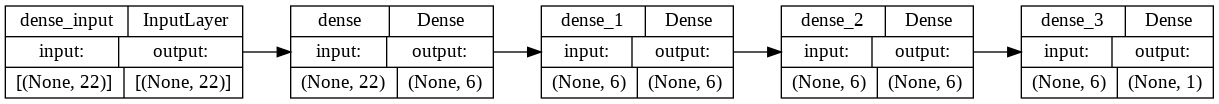

In [ ]:
keras.utils.plot_model(ann_clf, show_shapes=True, rankdir="LR")

In [ ]:
_, train_acc = ann_clf.evaluate(X_train, y_train, verbose=0)
_, val_acc = ann_clf.evaluate(X_val, y_val, verbose=0)
_, test_acc = ann_clf.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Validation: %.3f, Test: %.3f' % (train_acc, val_acc, test_acc))

Train: 0.921, Validation: 0.933, Test: 1.000


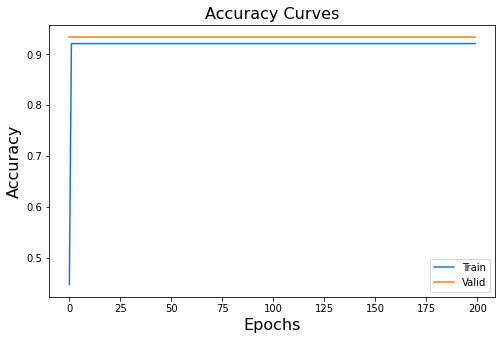

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(record.history['accuracy'], label='Train')
plt.plot(record.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

#### Experiment 2: Different batch sizes

In [ ]:
# Fit a model and plot learning curve
def fit_model_1(X_train, y_train, X_test, y_test, n_batch):
  # Define Model
  ann_clf = keras.models.Sequential([
      keras.layers.Dense(6, input_shape=(X_train.shape[1],), activation='sigmoid'),
      keras.layers.Dense(6, activation='sigmoid'),
      keras.layers.Dense(6, activation='sigmoid'), 
      # keras.layers.Dropout(0.2),
      keras.layers.Dense(1, activation = 'sigmoid')
  ])

  # Compile Model
  ann_clf.compile(optimizer = 'adam',
                metrics=['accuracy'],
                loss = 'binary_crossentropy')
  
  # Fit Model
  history = ann_clf.fit(X_train,
                      y_train,
                      validation_data=(X_test, y_test),
                      epochs=100,
                      verbose=0,
                      batch_size=n_batch)

  # Plot Learning Curves
  plt.plot(history.history['accuracy'], label='train') 
  plt.plot(history.history['val_accuracy'], label='test') 
  plt.title('batch='+str(n_batch)) 
  plt.legend()

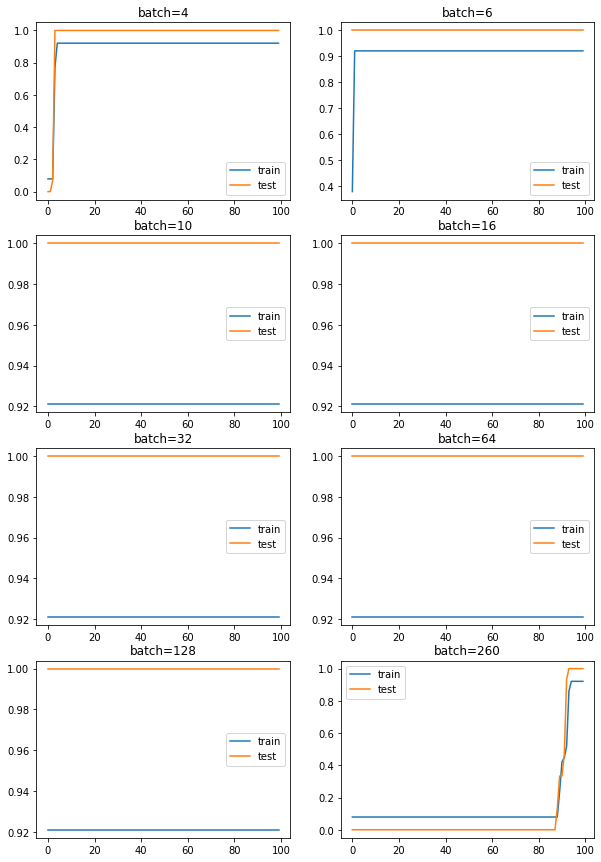

In [ ]:
# Create learning curves for different batch sizes
batch_sizes = [4, 6, 10, 16, 32, 64, 128, 260]

plt.figure(figsize=(10,15))
for i in range(len(batch_sizes)):

  # Determine the Plot Number
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)

  # Fit model and plot learning curves for a batch size
  fit_model_1(X_train, y_train, X_test, y_test, batch_sizes[i])

# Show learning curves
plt.show()

#### Experiment 3: Different EPOCHs

In [ ]:
# Fit a model and plot learning curve
def fit_model_2(trainX, trainy, validX, validy, n_epoch):
  # Define Model
  ann_clf = keras.models.Sequential([
      keras.layers.Dense(6, input_shape=(X_train.shape[1],), activation='sigmoid'),
      keras.layers.Dense(6, activation='sigmoid'),
      keras.layers.Dense(6, activation='sigmoid'), 
      # keras.layers.Dropout(0.2),
      keras.layers.Dense(1, activation = 'sigmoid')
  ])

  # Compile Model
  ann_clf.compile(optimizer = 'adam',
                metrics=['accuracy'],
                loss = 'binary_crossentropy')
    
  # fit model
  history = ann_clf.fit(X_train,
                      y_train,
                      validation_data=(X_test, y_test),
                      epochs=n_epoch,
                      verbose=0,
                      batch_size=6)
    
  # plot learning curves
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title('epoch='+str(n_epoch))
  plt.legend()

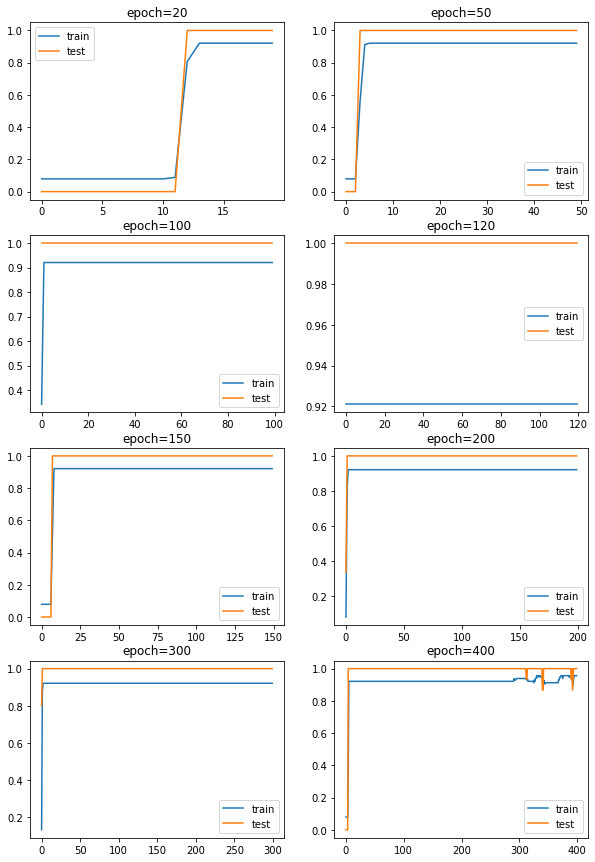

In [ ]:
# Create learning curves for different batch sizes
epochs = [20, 50, 100, 120, 150, 200, 300, 400]

plt.figure(figsize=(10,15))
for i in range(len(batch_sizes)):

  # Determine the Plot Number
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)

  # Fit model and plot learning curves for a batch size
  fit_model_2(X_train, y_train, X_test, y_test, epochs[i])

# Show learning curves
plt.show()

#### Experiment 4: Early stopping

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
def init_model():
  # Define Model
  ann_clf = keras.models.Sequential([
      keras.layers.Dense(6, input_shape=(X_train.shape[1],), activation='sigmoid'),
      keras.layers.Dense(6, activation='sigmoid'),
      keras.layers.Dense(6, activation='sigmoid'), 
      # keras.layers.Dropout(0.2),
      keras.layers.Dense(1, activation = 'sigmoid')
  ])

  # Compile Model
  ann_clf.compile(optimizer = 'adam',
                metrics=['accuracy'],
                loss = 'binary_crossentropy')
  return ann_clf

# init model
ann_clf = init_model()
# simple early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=150)
mc = ModelCheckpoint('best_model.h5',
                     monitor='val_accuracy',
                     mode='max',
                     verbose=1,
                     save_best_only=True)
history = ann_clf.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=250,
                    verbose=0,
                    batch_size=6,
                    callbacks=[es, mc])


Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to best_model.h5

Epoch 2: val_accuracy did not improve from 1.00000

Epoch 3: val_accuracy did not improve from 1.00000

Epoch 4: val_accuracy did not improve from 1.00000

Epoch 5: val_accuracy did not improve from 1.00000

Epoch 6: val_accuracy did not improve from 1.00000

Epoch 7: val_accuracy did not improve from 1.00000

Epoch 8: val_accuracy did not improve from 1.00000

Epoch 9: val_accuracy did not improve from 1.00000

Epoch 10: val_accuracy did not improve from 1.00000

Epoch 11: val_accuracy did not improve from 1.00000

Epoch 12: val_accuracy did not improve from 1.00000

Epoch 13: val_accuracy did not improve from 1.00000

Epoch 14: val_accuracy did not improve from 1.00000

Epoch 15: val_accuracy did not improve from 1.00000

Epoch 16: val_accuracy did not improve from 1.00000

Epoch 17: val_accuracy did not improve from 1.00000

Epoch 18: val_accuracy did not improve from 1.00000

Epoch 19: val_accuracy

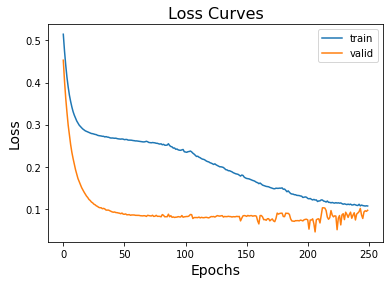

In [ ]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curves', fontsize=16)
plt.show()

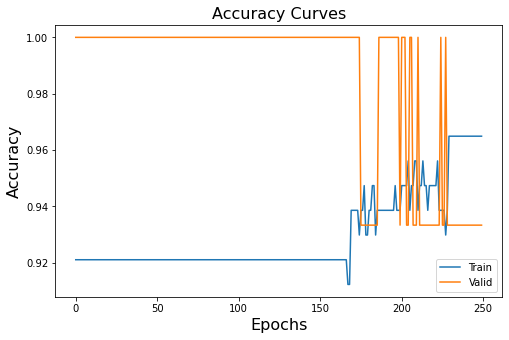

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

### Ensemble Learning

Library: Scikit-learn, Keras, Tensorflow

In [ ]:
display(models_eval)

,model_name,confusion_matrix,accuracy,recall,f1_score,roc_auc_score
0,rnd_clf0,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
1,rnd_clf1,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
2,rnd_clf2,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
3,tree_clf0,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
4,tree_clf1,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
5,tree_clf2,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
6,svc_clf0,"[14, 0, 1, 0]",0.933333,0.0,0.000000,0.500000
7,svc_clf1,"[14, 0, 1, 0]",0.933333,0.0,0.000000,0.500000
8,svc_clf2,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
9,log_clf0,"[14, 0, 1, 0]",0.933333,0.0,0.000000,0.500000


In [ ]:
from sklearn.ensemble import VotingClassifier

# Retrain top 3 models using their parameters specifically
model_1 = LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=10)
model_2 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.5, max_depth=1, random_state=10)
model_3 = RandomForestClassifier(n_estimators=1000, max_depth = None, n_jobs =-1, random_state=10)

name = 'ensem_clf'

train = pd.DataFrame(columns = ['voting', 'n_jobs'])
train = train.append({'voting': 'hard', 'n_jobs': -1}, ignore_index=True)
train = train.append({'voting': 'soft', 'n_jobs': -1}, ignore_index=True)
train = train.reset_index()

for index, row in train.iterrows():
    model_name = name + str(index)
    ens_clf = VotingClassifier(estimators=[('m1', model_1), ('m2', model_2), ('m3', model_3)],
                               voting = row['voting'],
                               n_jobs = int(row['n_jobs']))
    ens_clf.fit(X_train, y_train)
    y_true = y_val
    y_pred = ens_clf.predict(X_val)
    cfm = confusion_matrix(y_true, y_pred).ravel()
    acc = accuracy_score(y_true, y_pred)
    recs = recall_score(y_true, y_pred, average='binary')
    f1s = f1_score(y_true, y_pred, average='binary')
    rocs = roc_auc_score(y_true, y_pred, average='macro')

    models = models.append({'model_name': model_name, 
                            'model': ens_clf, 
                            'parameters': ens_clf.get_params()}, 
                           ignore_index=True)
    models_eval = models_eval.append({'model_name': model_name, 
                                      'confusion_matrix' : cfm, 
                                      'accuracy': acc, 
                                      'recall' : recs, 
                                      'f1_score': f1s, 
                                      'roc_auc_score': rocs}, 
                                     ignore_index=True)

ens_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('m1',
                              LGBMClassifier(max_depth=3, n_estimators=1000,
                                             random_state=10)),
                             ('m2',
                              GradientBoostingClassifier(learning_rate=0.5,
                                                         max_depth=1,
                                                         n_estimators=500,
                                                         random_state=10)),
                             ('m3',
                              RandomForestClassifier(n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=10))],
                 n_jobs=-1, voting='soft')

In [ ]:
display(models)

,model_name,model,parameters
0,rnd_clf0,"(DecisionTreeClassifier(max_features='auto', r...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
1,rnd_clf1,"(DecisionTreeClassifier(max_features='auto', r...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
2,rnd_clf2,"(DecisionTreeClassifier(max_features='auto', r...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
3,tree_clf0,DecisionTreeClassifier(random_state=10),"{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
4,tree_clf1,"DecisionTreeClassifier(criterion='entropy', ra...","{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
5,tree_clf2,"DecisionTreeClassifier(random_state=10, splitt...","{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
6,svc_clf0,SVC(random_state=10),"{'C': 1.0, 'break_ties': False, 'cache_size': ..."
7,svc_clf1,"SVC(kernel='sigmoid', random_state=10)","{'C': 1.0, 'break_ties': False, 'cache_size': ..."
8,svc_clf2,"SVC(kernel='linear', random_state=10)","{'C': 1.0, 'break_ties': False, 'cache_size': ..."
9,log_clf0,"LogisticRegression(n_jobs=-1, random_state=10)","{'C': 1.0, 'class_weight': None, 'dual': False..."


In [ ]:
display(models_eval)

,model_name,confusion_matrix,accuracy,recall,f1_score,roc_auc_score
0,rnd_clf0,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
1,rnd_clf1,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
2,rnd_clf2,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
3,tree_clf0,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
4,tree_clf1,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
5,tree_clf2,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
6,svc_clf0,"[14, 0, 1, 0]",0.933333,0.0,0.000000,0.500000
7,svc_clf1,"[14, 0, 1, 0]",0.933333,0.0,0.000000,0.500000
8,svc_clf2,"[14, 0, 0, 1]",1.000000,1.0,1.000000,1.000000
9,log_clf0,"[14, 0, 1, 0]",0.933333,0.0,0.000000,0.500000


## Model Testing

Identifying the best model (when considering their best parameters)

1.   Re-train models using both training and validation data
2.   Evaluate models using testing data



In [ ]:
_ = X_train.append(X_val, ignore_index=True)
_ = y_train.append(y_val, ignore_index=True)

In [ ]:
if len(X_train)==len(y_train) and len(X_test) == len(y_test):
  print("X and y data length matching")
else:
  print("Error in data pipeline")
print()
print("No. of training data = %d" % len(X_train))
print("No. of testing data = %d" % len(X_test))

X and y data length matching

No. of training data = 114
No. of testing data = 15


In [ ]:
# unique, counts = np.unique(y_train, return_counts=True)
# dict(zip(unique, counts))

y_train.value_counts()

0    105
1      9
Name: FireOccurred, dtype: int64

In [ ]:
models_final = pd.DataFrame(columns = ['model_name', 'model', 'parameters'])
models_test = pd.DataFrame(columns = ['model_name', 'confusion_matrix', 'accuracy', 'recall', 'f1_score', 'roc_auc_score'])

### Random Forest Classifier

In [ ]:
name = 'rnd_clf'

rnd_clf = RandomForestClassifier(n_estimators = 500, 
                                  max_depth = None, 
                                  n_jobs = -1, 
                                  random_state = 10
                                  ).fit(X_train,y_train)
y_true = y_val
y_pred = rnd_clf.predict(X_val)
cfm = confusion_matrix(y_true, y_pred).ravel()
acc = accuracy_score(y_true, y_pred)
recs = recall_score(y_true, y_pred, average='binary')
f1s = f1_score(y_true, y_pred, average='binary')
rocs = roc_auc_score(y_true, y_pred, average='macro')

models_final = models_final.append({'model_name': name, 
                        'model': rnd_clf, 
                        'parameters': rnd_clf.get_params()}, 
                       ignore_index=True)
models_test = models_test.append({'model_name': name, 
                                  'confusion_matrix' : cfm, 
                                  'accuracy': acc, 
                                  'recall' : recs, 
                                  'f1_score': f1s,
                                  'roc_auc_score': rocs}, 
                                 ignore_index=True)

### Decision Tree


In [ ]:
name = 'tree_clf'

tree_clf = DecisionTreeClassifier(criterion = 'gini', 
                                  splitter = 'best', 
                                  random_state = 10
                                  ).fit(X_train,y_train)
y_true = y_val
y_pred = tree_clf.predict(X_val)
cfm = confusion_matrix(y_true, y_pred).ravel()
acc = accuracy_score(y_true, y_pred)
recs = recall_score(y_true, y_pred, average='binary')
f1s = f1_score(y_true, y_pred, average='binary')
rocs = roc_auc_score(y_true, y_pred, average='macro')

models_final = models_final.append({'model_name': name, 
                        'model': tree_clf, 
                        'parameters': tree_clf.get_params()}, 
                       ignore_index=True)
models_test = models_test.append({'model_name': name, 
                                  'confusion_matrix' : cfm, 
                                  'accuracy': acc, 
                                  'recall' : recs, 
                                  'f1_score': f1s,
                                  'roc_auc_score': rocs}, 
                                 ignore_index=True)

### Support Vector Machine (SVM)

In [ ]:
name = 'svc_clf'

svc_clf = SVC(kernel = 'rbf', 
              random_state = 10
              ).fit(X_train,y_train)
y_true = y_val
y_pred = svc_clf.predict(X_val)
cfm = confusion_matrix(y_true, y_pred).ravel()
acc = accuracy_score(y_true, y_pred)
recs = recall_score(y_true, y_pred, average='binary')
f1s = f1_score(y_true, y_pred, average='binary')
rocs = roc_auc_score(y_true, y_pred, average='macro')

models_final = models_final.append({'model_name': name, 
                        'model': svc_clf, 
                        'parameters': svc_clf.get_params()}, 
                       ignore_index=True)
models_test = models_test.append({'model_name': name, 
                                  'confusion_matrix' : cfm, 
                                  'accuracy': acc, 
                                  'recall' : recs, 
                                  'f1_score': f1s,
                                  'roc_auc_score': rocs}, 
                                 ignore_index=True)

### Logistic Regression

In [ ]:
name = 'log_clf'

log_clf = LogisticRegression(penalty = 'l2', 
                             n_jobs = -1, 
                             random_state = 10
                             ).fit(X_train,y_train)
y_true = y_val
y_pred = log_clf.predict(X_val)
cfm = confusion_matrix(y_true, y_pred).ravel()
acc = accuracy_score(y_true, y_pred)
recs = recall_score(y_true, y_pred, average='binary')
f1s = f1_score(y_true, y_pred, average='binary')
rocs = roc_auc_score(y_true, y_pred, average='macro')

models_final = models_final.append({'model_name': name, 
                        'model': log_clf, 
                        'parameters': log_clf.get_params()}, 
                       ignore_index=True)
models_test = models_test.append({'model_name': name, 
                                  'confusion_matrix' : cfm, 
                                  'accuracy': acc, 
                                  'recall' : recs, 
                                  'f1_score': f1s,
                                  'roc_auc_score': rocs}, 
                                 ignore_index=True)

### Naive Bayes

In [ ]:
name = 'bayes_clf'

bayes_clf = GaussianNB(var_smoothing = 1e-20
                       ).fit(X_train,y_train)
y_true = y_val
y_pred = bayes_clf.predict(X_val)
cfm = confusion_matrix(y_true, y_pred).ravel()
acc = accuracy_score(y_true, y_pred)
recs = recall_score(y_true, y_pred, average='binary')
f1s = f1_score(y_true, y_pred, average='binary')
rocs = roc_auc_score(y_true, y_pred, average='macro')

models_final = models_final.append({'model_name': name, 
                        'model': bayes_clf, 
                        'parameters': bayes_clf.get_params()}, 
                       ignore_index=True)
models_test = models_test.append({'model_name': name, 
                                  'confusion_matrix' : cfm, 
                                  'accuracy': acc, 
                                  'recall' : recs, 
                                  'f1_score': f1s,
                                  'roc_auc_score': rocs}, 
                                 ignore_index=True)

### K-Nearest Neighbor

In [ ]:
name = 'neigh_clf'

neigh_clf = KNeighborsClassifier(n_neighbors = 5, 
                                 algorithm = 'auto', 
                                 n_jobs = -1, 
                                 ).fit(X_train,y_train)
y_true = y_val
y_pred = neigh_clf.predict(X_val)
cfm = confusion_matrix(y_true, y_pred).ravel()
acc = accuracy_score(y_true, y_pred)
recs = recall_score(y_true, y_pred, average='binary')
f1s = f1_score(y_true, y_pred, average='binary')
rocs = roc_auc_score(y_true, y_pred, average='macro')

models_final = models_final.append({'model_name': name, 
                        'model': neigh_clf, 
                        'parameters': neigh_clf.get_params()}, 
                       ignore_index=True)
models_test = models_test.append({'model_name': name, 
                                  'confusion_matrix' : cfm, 
                                  'accuracy': acc, 
                                  'recall' : recs, 
                                  'f1_score': f1s,
                                  'roc_auc_score': rocs}, 
                                 ignore_index=True)

### Gradient Boosting Classifier

In [ ]:
name = 'gboost_clf'

gboost_clf = GradientBoostingClassifier(n_estimators = 500, 
                                        learning_rate = 0.1, 
                                        max_depth = 3,
                                        random_state = 10
                                        ).fit(X_train,y_train)
y_true = y_val
y_pred = gboost_clf.predict(X_val)
cfm = confusion_matrix(y_true, y_pred).ravel()
acc = accuracy_score(y_true, y_pred)
recs = recall_score(y_true, y_pred, average='binary')
f1s = f1_score(y_true, y_pred, average='binary')
rocs = roc_auc_score(y_true, y_pred, average='macro')

models_final = models_final.append({'model_name': name, 
                        'model': gboost_clf, 
                        'parameters': gboost_clf.get_params()}, 
                       ignore_index=True)
models_test = models_test.append({'model_name': name, 
                                  'confusion_matrix' : cfm, 
                                  'accuracy': acc, 
                                  'recall' : recs, 
                                  'f1_score': f1s,
                                  'roc_auc_score': rocs}, 
                                 ignore_index=True)

### XGBoost

In [ ]:
name = 'xgboost_clf'

xgboost_clf = XGBClassifier(n_estimators = 500, 
                            learning_rate = 0.1,
                            max_depth = 3, 
                            random_state = 10
                            ).fit(X_train,y_train)
y_true = y_val
y_pred = xgboost_clf.predict(X_val)
cfm = confusion_matrix(y_true, y_pred).ravel()
acc = accuracy_score(y_true, y_pred)
recs = recall_score(y_true, y_pred, average='binary')
f1s = f1_score(y_true, y_pred, average='binary')
rocs = roc_auc_score(y_true, y_pred, average='macro')

models_final = models_final.append({'model_name': name, 
                        'model': xgboost_clf, 
                        'parameters': xgboost_clf.get_params()}, 
                       ignore_index=True)
models_test = models_test.append({'model_name': name, 
                                  'confusion_matrix' : cfm, 
                                  'accuracy': acc, 
                                  'recall' : recs, 
                                  'f1_score': f1s,
                                  'roc_auc_score': rocs}, 
                                 ignore_index=True)

### LightGBM

In [ ]:
name = 'lightgbm_clf'

lightgbm_clf = LGBMClassifier(n_estimators = 500, 
                              learning_rate = 0.1, 
                              max_depth = 3,
                              random_state = 10
                              ).fit(X_train,y_train)
y_true = y_val
y_pred = lightgbm_clf.predict(X_val)
cfm = confusion_matrix(y_true, y_pred).ravel()
acc = accuracy_score(y_true, y_pred)
recs = recall_score(y_true, y_pred, average='binary')
f1s = f1_score(y_true, y_pred, average='binary')
rocs = roc_auc_score(y_true, y_pred, average='macro')

models_final = models_final.append({'model_name': name, 
                        'model': lightgbm_clf, 
                        'parameters': lightgbm_clf.get_params()}, 
                       ignore_index=True)
models_test = models_test.append({'model_name': name, 
                                  'confusion_matrix' : cfm, 
                                  'accuracy': acc, 
                                  'recall' : recs, 
                                  'f1_score': f1s,
                                  'roc_auc_score': rocs}, 
                                 ignore_index=True)

### Artificial Neural Network

### Ensemble Learning

In [ ]:
display(models_test)

,model_name,confusion_matrix,accuracy,recall,f1_score,roc_auc_score
0,rnd_clf,"[14, 0, 0, 1]",1.000000,1.0,1.0,1.0
1,tree_clf,"[14, 0, 0, 1]",1.000000,1.0,1.0,1.0
2,svc_clf,"[14, 0, 1, 0]",0.933333,0.0,0.0,0.5
3,log_clf,"[14, 0, 1, 0]",0.933333,0.0,0.0,0.5
4,bayes_clf,"[14, 0, 0, 1]",1.000000,1.0,1.0,1.0
5,neigh_clf,"[14, 0, 1, 0]",0.933333,0.0,0.0,0.5
6,gboost_clf,"[14, 0, 1, 0]",0.933333,0.0,0.0,0.5
7,xgboost_clf,"[14, 0, 1, 0]",0.933333,0.0,0.0,0.5
8,lightgbm_clf,"[14, 0, 0, 1]",1.000000,1.0,1.0,1.0


In [ ]:
name = 'ensem_clf'

ensem_clf = VotingClassifier(estimators=[('m1', rnd_clf), ('m2', xgboost_clf), ('m3', lightgbm_clf)],
                             voting = 'hard',
                             n_jobs = -1, 
                             ).fit(X_train,y_train)
y_true = y_val
y_pred = ensem_clf.predict(X_val)
cfm = confusion_matrix(y_true, y_pred).ravel()
acc = accuracy_score(y_true, y_pred)
recs = recall_score(y_true, y_pred, average='binary')
f1s = f1_score(y_true, y_pred, average='binary')
rocs = roc_auc_score(y_true, y_pred, average='macro')

models_final = models_final.append({'model_name': name, 
                        'model': ensem_clf, 
                        'parameters': ensem_clf.get_params()}, 
                       ignore_index=True)
models_test = models_test.append({'model_name': name, 
                                  'confusion_matrix' : cfm, 
                                  'accuracy': acc, 
                                  'recall' : recs, 
                                  'f1_score': f1s,
                                  'roc_auc_score': rocs}, 
                                 ignore_index=True)

## Discussion & Conclusion

In [ ]:
display(models_final)

,model_name,model,parameters
0,rnd_clf,"(DecisionTreeClassifier(max_features='auto', r...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
1,tree_clf,DecisionTreeClassifier(random_state=10),"{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
2,svc_clf,SVC(random_state=10),"{'C': 1.0, 'break_ties': False, 'cache_size': ..."
3,log_clf,"LogisticRegression(n_jobs=-1, random_state=10)","{'C': 1.0, 'class_weight': None, 'dual': False..."
4,bayes_clf,GaussianNB(var_smoothing=1e-20),"{'priors': None, 'var_smoothing': 1e-20}"
5,neigh_clf,KNeighborsClassifier(n_jobs=-1),"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
6,gboost_clf,([DecisionTreeRegressor(criterion='friedman_ms...,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."
7,xgboost_clf,"XGBClassifier(n_estimators=500, random_state=10)","{'base_score': 0.5, 'booster': 'gbtree', 'cols..."
8,lightgbm_clf,"LGBMClassifier(max_depth=3, n_estimators=500, ...","{'boosting_type': 'gbdt', 'class_weight': None..."
9,ensem_clf,"VotingClassifier(estimators=[('m1',\n ...","{'estimators': [('m1', RandomForestClassifier(..."


In [ ]:
display(models_test)

,model_name,confusion_matrix,accuracy,recall,f1_score,roc_auc_score
0,rnd_clf,"[14, 0, 0, 1]",1.000000,1.0,1.0,1.0
1,tree_clf,"[14, 0, 0, 1]",1.000000,1.0,1.0,1.0
2,svc_clf,"[14, 0, 1, 0]",0.933333,0.0,0.0,0.5
3,log_clf,"[14, 0, 1, 0]",0.933333,0.0,0.0,0.5
4,bayes_clf,"[14, 0, 0, 1]",1.000000,1.0,1.0,1.0
5,neigh_clf,"[14, 0, 1, 0]",0.933333,0.0,0.0,0.5
6,gboost_clf,"[14, 0, 1, 0]",0.933333,0.0,0.0,0.5
7,xgboost_clf,"[14, 0, 1, 0]",0.933333,0.0,0.0,0.5
8,lightgbm_clf,"[14, 0, 0, 1]",1.000000,1.0,1.0,1.0
9,ensem_clf,"[14, 0, 0, 1]",1.000000,1.0,1.0,1.0


After model testing, the best model identified is ...